# Principles of Nonlinear Structural Stability

In [1]:
# Import settings and constants
import os   # module for interfacing with the underlying operating system
import sys  # module for interacting with the Python interpreter
parent_directory = os.path.join(os.path.dirname(os.getcwd()))
sys.path.append(parent_directory)
from settings import *

# Define name of directory where to save analyses and figures
ANALYSIS_DIRECTORY_PATH = os.getcwd()

## One-Degree-of-Freedom Systems

### Supercritical Pitchfork Bifurcation

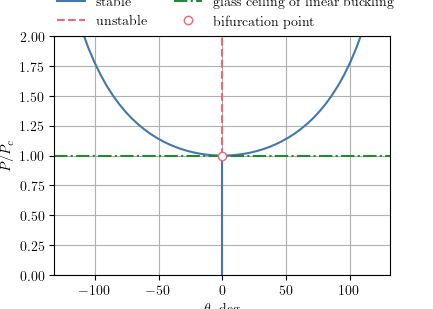

In [2]:
%matplotlib widget

import numpy as np  # package for scientific computing

# Change default marker size
plt.rcParams.update({'lines.markersize': 6})

# Plot trivial stable solution of perfect system
fig, ax = plt.subplots(figsize=(TEXTWIDTH_INCHES*.7, TEXTWIDTH_INCHES*.5))
theta_trivial_stable = np.array([0., 0.])  # deg
load_trivial_stable = np.array([0., 1.])
stable_line = ax.plot(theta_trivial_stable, load_trivial_stable, label="stable")

# Plot nontrivial stable solution of perfect system
theta_max = 120  # deg
theta_nontrivial = np.linspace(-theta_max, theta_max)  # deg
load_nontrivial = np.deg2rad(theta_nontrivial)/np.sin(np.deg2rad(theta_nontrivial))
ax.plot(theta_nontrivial, load_nontrivial, color=COLORS[0])

# Plot trivial unstable solution of perfect system
theta_trivial_unstable = np.array([0., 0.])  # deg
load_trivial_unstable = np.array([1., np.max(load_nontrivial)])
ax.plot(theta_trivial_unstable, load_trivial_unstable, UNSTABLE_COLOR, linestyle='--', label="unstable")

# Plot glass ceiling of linear buckling
ax.axhline(y=1, color=GLASS_CEILING_COLOR, linestyle='-.', label="glass ceiling of linear buckling")

# Plot bifurcation point
ax.plot(0, 1, 'o', mec=UNSTABLE_COLOR, mfc='w', label="bifurcation point")

# Set plot appearance
ax.set_xlabel("$\\theta,\,\mathrm{deg}$")
ax.set_ylabel("$P/P_c$")
ax.set_ylim([0, 2])
ax.grid()
fig.legend(loc="upper center", bbox_to_anchor=(0.52, 1.05), ncol=2, frameon=False)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "SupercriticalPitchforkBifurcation.pdf"), bbox_inches='tight', pad_inches=0)

### Broken Supercritical Pitchfork

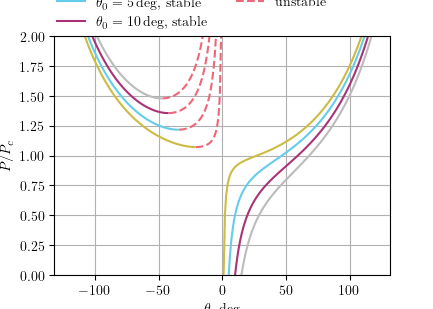

In [3]:
from matplotlib.lines import Line2D  # class for creating custom legend entries

color_starting_index = 1  # index of first color to use for plotting
imperfections = [1, 5, 10, 15]  # [deg]
fig, ax = plt.subplots(figsize=(TEXTWIDTH_INCHES*.7, TEXTWIDTH_INCHES*.5))
for count, theta_0 in enumerate(imperfections):  # iterate through initial angles theta_0
    theta_negative = np.arange(-theta_max, 0)
    theta_positive = np.arange(theta_0, theta_max + 1)
    load_theta_negative = np.deg2rad(theta_negative - theta_0)/np.sin(np.deg2rad(theta_negative))
    load_theta_positive = np.deg2rad(theta_positive - theta_0)/np.sin(np.deg2rad(theta_positive))
    stability_theta_negative = np.deg2rad(theta_negative - theta_0)/np.tan(np.deg2rad(theta_negative))
    ax.plot(theta_negative[stability_theta_negative<1], load_theta_negative[stability_theta_negative<1],
    color=COLORS[color_starting_index + count], label=f"$\\theta_0={theta_0:d}\,\mathrm{{deg}}$, stable")
    ax.plot(theta_negative[stability_theta_negative>1], load_theta_negative[stability_theta_negative>1], UNSTABLE_COLOR, linestyle="--")
    ax.plot(theta_positive, load_theta_positive, color=COLORS[color_starting_index + count])
ax.set_xlabel("$\\theta,\,\mathrm{deg}$")
ax.set_ylabel("$P/P_c$")
ax.set_ylim([0, 2])
handles, labels = ax.get_legend_handles_labels()
handles.append(Line2D([0], [0], color=UNSTABLE_COLOR, linestyle='--', label="unstable"))
labels.append("unstable")
ax.legend(handles=handles, labels=labels, loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2, frameon=False)
ax.grid()
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "BrokenSupercriticalPitchfork.pdf"), bbox_inches='tight', pad_inches=0)

### Subcritical Pitchfork Bifurcation

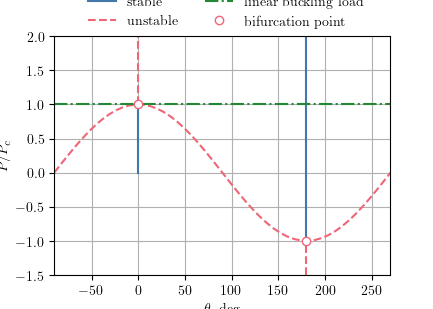

In [4]:
# Plot trivial stable solution of perfect system
fig, ax = plt.subplots(figsize=(TEXTWIDTH_INCHES*.7, TEXTWIDTH_INCHES*.5))
theta_trivial_stable = np.array([0., 0.])  # deg
load_trivial_stable = np.array([0., 1.])
stable_line = ax.plot(theta_trivial_stable, load_trivial_stable, label="stable")

# Plot nontrivial stable solution of perfect system
theta_min = -90  # deg
theta_max = 270  # deg
theta_nontrivial = np.linspace(theta_min, theta_max)  # deg
load_nontrivial = np.cos(np.deg2rad(theta_nontrivial))
ax.plot(theta_nontrivial, load_nontrivial, color=UNSTABLE_COLOR, linestyle='--')

# Plot trivial unstable solution of perfect system
theta_trivial_unstable = np.array([0., 0.])  # deg
load_trivial_unstable = np.array([1., 2.])
ax.plot(theta_trivial_unstable, load_trivial_unstable, UNSTABLE_COLOR, linestyle='--', label="unstable")

# Plot theta=pi stable and unstable solutions
theta_pi_stable = np.rad2deg(np.pi)*np.ones(2)
load_pi_stable = np.array([-1., 2.])
ax.plot(theta_pi_stable, load_pi_stable, color=COLORS[0])
theta_pi_unstable = np.rad2deg(np.pi)*np.ones(2)
load_pi_unstable = np.array([-1.5, -1.])
ax.plot(theta_pi_unstable, load_pi_unstable, color=UNSTABLE_COLOR, linestyle='--')


# Plot glass ceiling of linear buckling
ax.axhline(y=1, color=GLASS_CEILING_COLOR, linestyle='-.', label="linear buckling load")

# Plot bifurcation points
ax.plot(0, 1, 'o', mec=UNSTABLE_COLOR, mfc='w', label="bifurcation point")
ax.plot(np.rad2deg(np.pi), -1, 'o', mec=UNSTABLE_COLOR, mfc='w')

# Set plot appearance
ax.set_xlabel("$\\theta,\,\mathrm{deg}$")
ax.set_ylabel("$P/P_c$")
ax.set_xlim([theta_min, theta_max])
ax.set_ylim([-1.5, 2])
ax.grid()
fig.legend(loc="upper center", bbox_to_anchor=(0.52, 1.05), ncol=2, frameon=False)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "SubcriticalPitchforkBifurcation.pdf"), bbox_inches='tight', pad_inches=0)

### Broken Subcritical Pitchfork

C:\Users\qa21944\AppData\Local\Temp\ipykernel_10800\3580231428.py:10: RuntimeWarning: divide by zero encountered in divide
  load_theta = (1-np.sin(theta_0_rad)/np.sin(theta_range_rad))*np.cos(theta_range_rad)
C:\Users\qa21944\AppData\Local\Temp\ipykernel_10800\3580231428.py:11: RuntimeWarning: divide by zero encountered in divide
  stability_theta = np.sin(theta_range_rad)*(np.sin(theta_0_rad)/np.tan(theta_range_rad)**2 + np.sin(theta_0_rad) - np.sin(theta_range_rad))
C:\Users\qa21944\AppData\Local\Temp\ipykernel_10800\3580231428.py:11: RuntimeWarning: invalid value encountered in multiply
  stability_theta = np.sin(theta_range_rad)*(np.sin(theta_0_rad)/np.tan(theta_range_rad)**2 + np.sin(theta_0_rad) - np.sin(theta_range_rad))


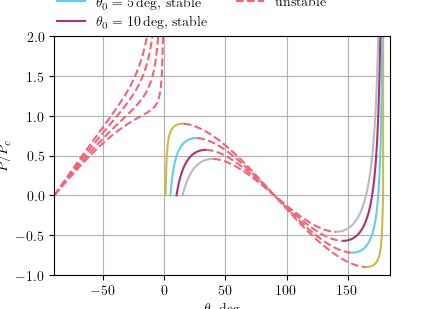

In [5]:
theta_max = 180  # deg
fig, ax = plt.subplots(figsize=(TEXTWIDTH_INCHES*.7, TEXTWIDTH_INCHES*.5))
lines = []
for count, theta_0 in enumerate(imperfections):  # iterate through initial angles theta_0
    # Set up theta range, calculate load and stability
    theta_0_rad = np.deg2rad(theta_0)
    theta_range = np.arange(theta_min, theta_max + 1)
    theta_range = theta_range[(theta_range <= 0) | (theta_range>=theta_0)]  # remove theta=0 from range
    theta_range_rad = np.deg2rad(theta_range)
    load_theta = (1-np.sin(theta_0_rad)/np.sin(theta_range_rad))*np.cos(theta_range_rad)
    stability_theta = np.sin(theta_range_rad)*(np.sin(theta_0_rad)/np.tan(theta_range_rad)**2 + np.sin(theta_0_rad) - np.sin(theta_range_rad))
    # Identify indices where stability changes sign (indicating a change in stability)
    sign_changes = np.where(np.diff(np.sign(stability_theta)))[0]
    segment_indices = [0] + list(sign_changes + 1) + [len(theta_range) - 1]
    # Plot load vs theta by stability segment
    for start, end in zip(segment_indices[:-1], segment_indices[1:]):
        if stability_theta[start] > 0:
            color = COLORS[color_starting_index + count]
            linestyle = "-"
        else:
            color = UNSTABLE_COLOR
            linestyle = "--"
        ax.plot(theta_range[start:end+1], load_theta[start:end+1], color=color, linestyle=linestyle)
    # Add legend entry for theta_0
    lines.append(Line2D([0], [0], color=COLORS[color_starting_index + count], linestyle="-", label=f"$\\theta_0={theta_0:d}\,\mathrm{{deg}}$, stable"))
ax.set_xlabel("$\\theta,\,\mathrm{deg}$")
ax.set_ylabel("$P/P_c$")
ax.set_xlim([theta_min, theta_max + 5])
ax.set_ylim([-1, 2])
lines.append(Line2D([0], [0], color=UNSTABLE_COLOR, linestyle='--', label="unstable"))
ax.legend(handles=lines, loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2, frameon=False)
ax.grid()
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "BrokenSubcriticalPitchfork.pdf"), bbox_inches='tight', pad_inches=0)

### Limit point bifurcation

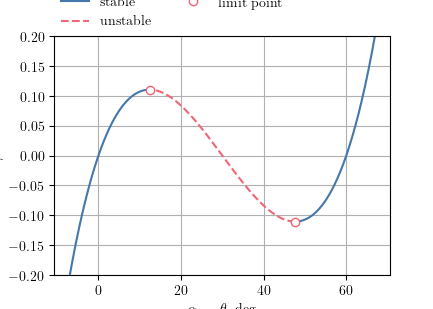

In [6]:
alpha_0 = 30  # deg
theta_max = 37  # deg
step = 0.1  # deg
theta = np.arange(-theta_max, theta_max + step, step)  # deg

nondimensional_load = 4 * (np.sin(np.deg2rad(theta)) - np.cos(np.deg2rad(alpha_0)) * np.tan(np.deg2rad(theta)))
stability = (np.cos(np.deg2rad(alpha_0)) - np.cos(np.deg2rad(theta))**3) / np.cos(np.deg2rad(theta))

# Create an array for alpha_0 - theta
alpha_minus_theta = alpha_0 - theta

# Split data into segments with the same sign of stability
segments = []
current_segment_indices = []
limit_point_indices = []
for i in range(len(alpha_minus_theta)):
    if i == 0 or np.sign(stability[i]) == np.sign(stability[i - 1]):
        current_segment_indices.append(i)
    else:
        segments.append(current_segment_indices)
        current_segment_indices = [i]
        limit_point_indices.append(i - 1)  # the limit point is taken as the last point with same stability for visualization purposes
segments.append(current_segment_indices)  # Append the last segment

# Create a figure and axis
fig, ax = plt.subplots(figsize=(TEXTWIDTH_INCHES*.7, TEXTWIDTH_INCHES*.5))

# Plot line segments separately based on stability sign
for segment in segments:
    if stability[segment[0]] >= 0:
        ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=COLORS[0])
    else:
        ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=UNSTABLE_COLOR, linestyle="--")
ax.plot(alpha_minus_theta[limit_point_indices], nondimensional_load[limit_point_indices], "o", mec=UNSTABLE_COLOR, mfc="w")

# Label the axes and set limts
plt.xlabel("$\\alpha_0 - \\theta,\,\mathrm{deg}$")
plt.ylabel("$P/kl$")
plt.ylim([-0.2, 0.2])

# Create proxy artists for the legend
stable_line = Line2D([0], [0], color=COLORS[0], label="stable")
unstable_line = Line2D([0], [0], color=UNSTABLE_COLOR, linestyle='--', label="unstable")
limit_point = Line2D([0], [0], marker='o', mec=UNSTABLE_COLOR, mfc='w', linestyle='None', label="limit point")

# Display the legend with the proxy artists
plt.legend(handles=[stable_line, unstable_line, limit_point], loc="upper center", bbox_to_anchor=(0.35, 1.22), ncol=2, frameon=False)

# Show the plot
plt.grid(True)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "LimitPointBifurcation.pdf"), bbox_inches='tight', pad_inches=0)

In [7]:
# Restore default marker size
plt.rcParams.update({'lines.markersize': DEFAULT_MARKER_SIZE})

### A numerical Example: Euler's column

Define model and calculate linear buckling load.

In [8]:
# Import helper modules
main_directory = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(main_directory)
from resources import column_utils, pynastran_utils

# Create base bdf input
E = 207000.  # Young's modulus [MPa]
nu = 0.3  # Poisson's ratio
rho = 7.8e-4  # density [tons/mm^3]
d = 20  # diameter [mm]
l = 420  # length [mm]
no_elements = 420  # number of beam elements
bdf_input = column_utils.create_base_bdf(young_modulus=E, poisson_ratio=nu, density=rho, diameter=d, length=l,
                                         no_elements=no_elements)

# Run linear buckling analysis
compression_force_set_id = list(bdf_input.loads.keys())[0]  # find set identification number of compression force
input_name = "sol_105"
sol_105_op2 = pynastran_utils.run_sol_105(
        bdf=bdf_input.__deepcopy__({}), static_load_set_id=compression_force_set_id, analysis_directory_path=ANALYSIS_DIRECTORY_PATH,
        input_name=input_name, run_flag=False)
linear_buckling_load = sol_105_op2.eigenvectors[SECOND_SUBCASE_ID].eigr
print(f"Linear buckling load: {linear_buckling_load:.0f} N")

Linear buckling load: 90578 N


subcase=0 already exists...skipping


Plot critical buckling mode.

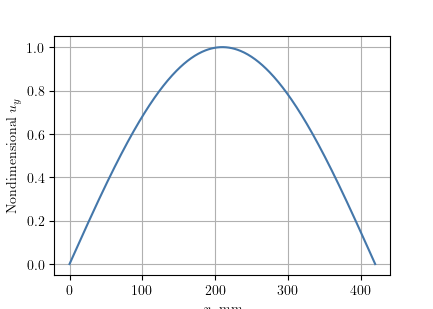

In [9]:
# Create figure
fig, ax = plt.subplots(figsize=(TEXTWIDTH_INCHES*.7, TEXTWIDTH_INCHES*.5))

# Calculate coordinates of nodes in the buckling shape
nodes_xy_coordinates = np.vstack([sol_105_op2.nodes[index].xyz[0:2] for index in sol_105_op2.nodes.keys()]) + \
    np.squeeze([*sol_105_op2.eigenvectors.values()][0].data[0, :, 0:2])
                           
# Plot nodes
ax.plot(nodes_xy_coordinates[:, 0], nodes_xy_coordinates[:, 1], '-')
    
# Set axes labels and grid
plt.xlabel('$x$, mm')
plt.ylabel('Nondimensional $u_y$')
plt.grid()
    
# Show plot and save figure
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "EulerColumnLinearBuckling.pdf"), bbox_inches='tight', pad_inches=0)

Run nonlinear analysis.

In [10]:
# Increase compression force to twice the linear buckling load
bdf_input.loads[compression_force_set_id][0].mag = linear_buckling_load*2

# Define transverse force as 1% of linear buckling load at central node
compression_force_set_id = list(bdf_input.loads.keys())[0]  # find set identification number of compression force
transverse_force_set_id = compression_force_set_id + 1  # define set idenfitication number of transverse force
central_node_id = int(no_elements/2 + 1)  # find id of central node
transverse_force_magnitude = linear_buckling_load/50  # [N]
transverse_force_direction = [0., 1., 0.]
bdf_input.add_force(sid=transverse_force_set_id, node=central_node_id, mag=transverse_force_magnitude,
                    xyz=transverse_force_direction)  # add FORCE card to bdf input

# Define load set with combined compression and transverse forces
combined_load_set_id = transverse_force_set_id + 1
bdf_input.add_load(combined_load_set_id, scale=1., scale_factors=[1., 1.], load_ids=[compression_force_set_id, transverse_force_set_id])

# Define load set with no applied force
zero_load_set_id = combined_load_set_id + 1
bdf_input.add_load(zero_load_set_id, scale=1., scale_factors=[0.], load_ids=[compression_force_set_id])

# Define subcases
pynastran_utils.create_static_load_subcase(bdf=bdf_input, subcase_id=1, load_set_id=compression_force_set_id)  # load with compression only
pynastran_utils.create_static_load_subcase(bdf=bdf_input, subcase_id=2, load_set_id=zero_load_set_id)  # unload
pynastran_utils.create_static_load_subcase(bdf=bdf_input, subcase_id=3, load_set_id=combined_load_set_id)  # load with combined compression and transverse force
pynastran_utils.create_static_load_subcase(bdf=bdf_input, subcase_id=4, load_set_id=compression_force_set_id)  # load with compression only
pynastran_utils.create_static_load_subcase(bdf=bdf_input, subcase_id=5, load_set_id=zero_load_set_id)  # unload

# Setup SOL 106 with arc-length method using parameters for fine resolution of equilibrium path
pynastran_utils.set_up_arc_length_method(
        bdf=bdf_input, ninc=100, conv='PUV', eps_u=1e-3, eps_p=1e-3, max_bisect=10, minalr=1e-2, maxalr=1.01, desiter=5, maxinc=2000)
load_control_nlparm_id = 2
pynastran_utils.set_up_newton_method(
        bdf=bdf_input, nlparm_id=load_control_nlparm_id, ninc=100, conv='PUV', eps_u=1e-3, eps_p=1e-3, max_bisect=10, subcase_id=4)
bdf_input.case_control_deck.subcases[5].add_integer_type('NLPARM', load_control_nlparm_id)  # add NLPARM card to subcase 5

# Run analysis
method_set_id = zero_load_set_id + 1
no_eigenvalues = 10
input_name = "sol_106"
sol_106_op2 = pynastran_utils.run_sol_106_with_kllrh_eigenvalues(
    bdf=bdf_input, method_set_id=method_set_id, no_eigenvalues=no_eigenvalues,
    analysis_directory_path=ANALYSIS_DIRECTORY_PATH, input_name=input_name, run_flag=False)

Nastran job sol_106.bdf completed
Wall time: 129.0 s


Plot eigenvalue diagrams.

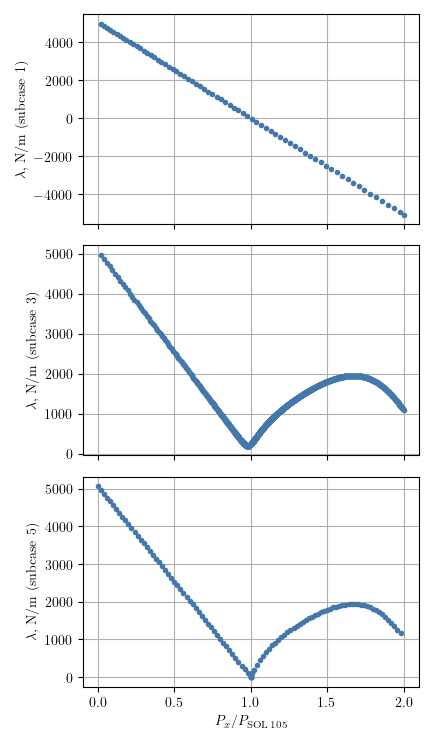

In [11]:
# Read load and displacement histories
monitor_node_id = 1  # id of node to monitor
_, loads, displacements = pynastran_utils.read_load_displacement_history_from_op2(op2=sol_106_op2, node_ids=[monitor_node_id])
nondimensional_load_x = {key: -loads[key][:, 0]/linear_buckling_load for key in loads}
rotations = {key: np.rad2deg(displacements[monitor_node_id][key][:, 5]) for key in displacements[monitor_node_id]}

# Read eigenvalues
f06_path = os.path.join(ANALYSIS_DIRECTORY_PATH, input_name + '.f06')  # path to .f06 file
eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_path)
subcase_start_end_indices = np.array([0] + [len(loads[key]) for key in loads]).cumsum()
eigvals_by_subcase = {key: eigenvalues[:, start:end] for key, (start, end) in zip(loads.keys(), zip(subcase_start_end_indices[:-1], subcase_start_end_indices[1:]))}

# Create the figure with two subplots
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(TEXTWIDTH_INCHES*.7, TEXTWIDTH_INCHES*.4*3))
plot_subcases_list = [1, 3, 5]  # list of subcases to plot
for i, key in enumerate(plot_subcases_list):
    # Plot eigenvalues vs nondimensional applied loads
    axes[i].plot(nondimensional_load_x[key], eigvals_by_subcase[key][0, :].T*1e3, 'o')  # convert eigenvalues from N/mm to N/m
    axes[i].set_ylabel(f"$\lambda$, N/m (subcase {key})")
    axes[i].grid(True)

# Set plot appearance
axes[i].set_xlabel("$P_x/P_\mathrm{SOL\,105}$")
plt.tight_layout()  # adjust subplots' layout
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "EulerColumnSmallestEigenvalue.pdf"), bbox_inches='tight', pad_inches=0)


Plot load-displacement curves.

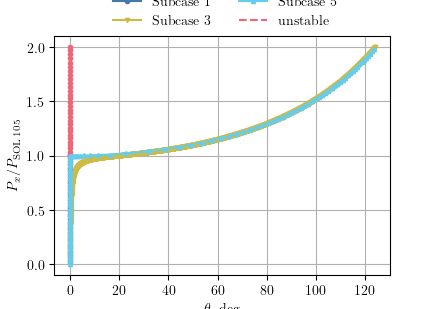

In [12]:
from resources import plot_utils

# Create figure
fig, ax = plt.subplots(figsize=(TEXTWIDTH_INCHES*.7, TEXTWIDTH_INCHES*.5))
stable_lines = []
for i, subcase_id in enumerate(plot_subcases_list):
    plot_utils.plot_2d_load_displacements_stability(
        ax, rotations[subcase_id], nondimensional_load_x[subcase_id], eigvals_by_subcase[subcase_id],
        MARKERS[i], COLORS[i])
    stable_lines.append(Line2D([0], [0], linestyle='-', marker=MARKERS[i], color=COLORS[i], label=f"Subcase {subcase_id}"))

# Set plot appearance
ax.set_xlabel("$\\theta,\,\mathrm{deg}$")
ax.set_ylabel("$P_x/P_\mathrm{SOL\,105}$")
ax.grid()
fig.legend(handles=stable_lines + [unstable_line], loc="upper center", bbox_to_anchor=(0.52, 1.05), ncol=2, frameon=False)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "EulerColumnLoadDisplacement.pdf"), bbox_inches='tight', pad_inches=0)